In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df_original = pd.read_excel('../data/raw.xlsx')
df = df_original.copy()

### Partie 1 : Notebook d’exploration visuelle complète

L'objectif de cette partie est d'utiliser les connaissances acquises sur l'exploration visuelle dans le cours et de l'appliquer afin d'acquérir une compréhension exhaustive du jeu de données.

#### Fiche synthétique des données : source, période couverte, volume, colonnes importantes.

* The Data used here are present in the data folder and are available online at https://archive.ics.uci.edu/dataset/502/online+retail+ii


In [4]:
df = df_original.copy()
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
# Period of time covered by the data
start , end  = df.InvoiceDate.min(), df.InvoiceDate.max()
print("Start Date: ", start)
print("End Date: ", end)

Start Date:  2009-12-01 07:45:00
End Date:  2010-12-09 20:01:00


In [6]:
# nombre de jour concerne par l`etude
print(end.dayofyear + (365 - start.dayofyear) )

373


In [7]:
# let present the volume of the dataset we are working on
df.shape


(525461, 8)

In [8]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [9]:
numerical_columns = list()
categorical_columns = list()
for column in df.columns:
    if df[column].dtype != 'object':
        numerical_columns.append(column)
    else:
        categorical_columns.append(column)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [11]:
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

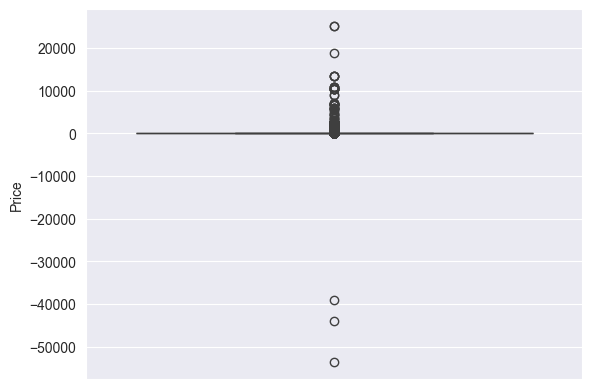

In [12]:
# let  find the outliers for the quantity and price
sns.boxplot(df.Price)
plt.show()

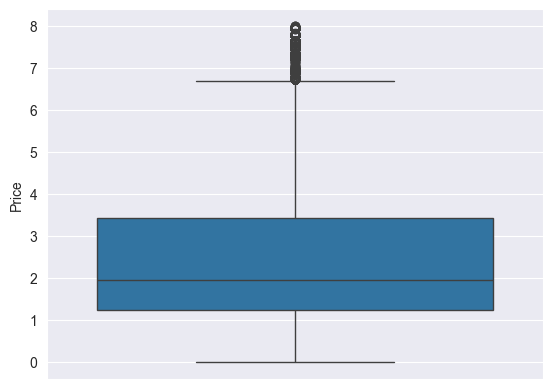

In [13]:
# Droping none coherent numerical data in price and quantity
df[df.Price > 8 ] = np.nan
df[df.Price < 0 ] = np.nan

sns.boxplot(df.Price)
plt.show()

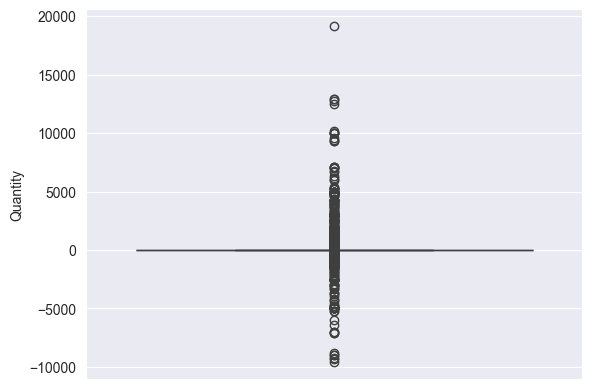

In [15]:
sns.boxplot(df.Quantity)
plt.show()

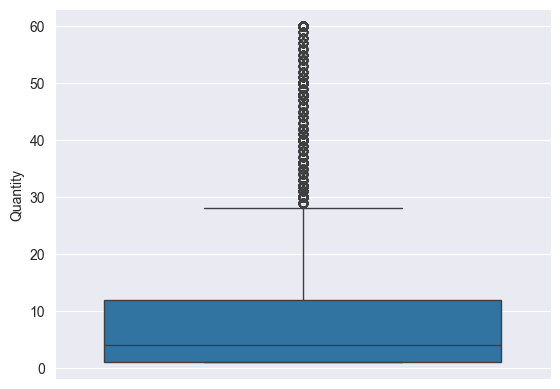

In [16]:
df[df.Quantity > 60 ] = np.nan
df[df.Quantity < 0 ] = np.nan

sns.boxplot(df.Quantity)
plt.show()

In [18]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,458042.000000,458042,458042.000000,371545.000000
mean,7.366235,2010-06-29 12:13:59.989520896,2.573372,15381.731909
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,1.000000,2010-03-21 15:50:00,1.250000,14016.000000
50%,4.000000,2010-07-08 08:08:00,1.950000,15358.000000
75%,12.000000,2010-10-17 12:52:00,3.750000,16830.000000
max,60.000000,2010-12-09 20:01:00,8.000000,18287.000000
std,9.205945,NaN,1.853966,1678.391639


In [21]:
df.isna().sum()

Invoice         67419
StockCode       67419
Description     68304
Quantity        67419
InvoiceDate     67419
Price           67419
Customer ID    153916
Country         67419
dtype: int64

In [23]:
# defining the level granularty of invoiceDate
df.InvoiceDate = pd.to_datetime(df.InvoiceDate).dt.date
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01,1.25,13085.0,United Kingdom


In [25]:
df.shape

(525461, 8)

In [26]:
df1 = df.dropna()

In [28]:
df2 = df1.drop_duplicates()

In [33]:
# new data set after preparation
df2.to_csv('../data/newdata.csv')